In [25]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.svm import SVC
from sklearn.preprocessing import LabelEncoder, MinMaxScaler, StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.ensemble import IsolationForest
from sklearn.model_selection import train_test_split


In [3]:
df = df = pd.read_csv('forestfires.csv')

In [18]:
print("Dataset size (rows, columns):", df.shape)

Dataset size (rows, columns): (512, 27)


In [19]:
df.head()

,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,dayfri,daysat,daysun,daythu,daytue,daywed,monthapr,monthaug,monthdec,monthfeb,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
0,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1
1,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1
2,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1
3,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1
4,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1


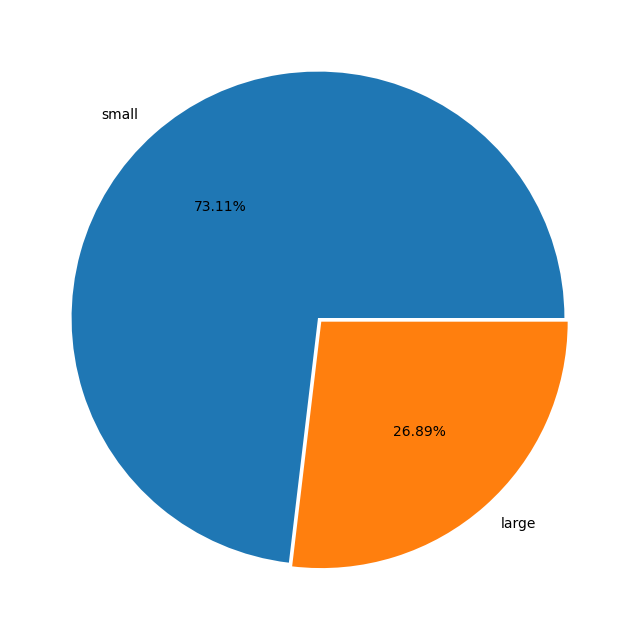

In [6]:
#Fires based off size

pd.set_option("display.max_columns", 31)
y_count = df.size_category.value_counts().reset_index().rename(columns= {'count':'counts'})
plt.figure(figsize=(8,8))
plt.pie(y_count.counts, labels=y_count['size_category'], autopct='%1.2f%%', explode=(0, 0.02))
plt.show()

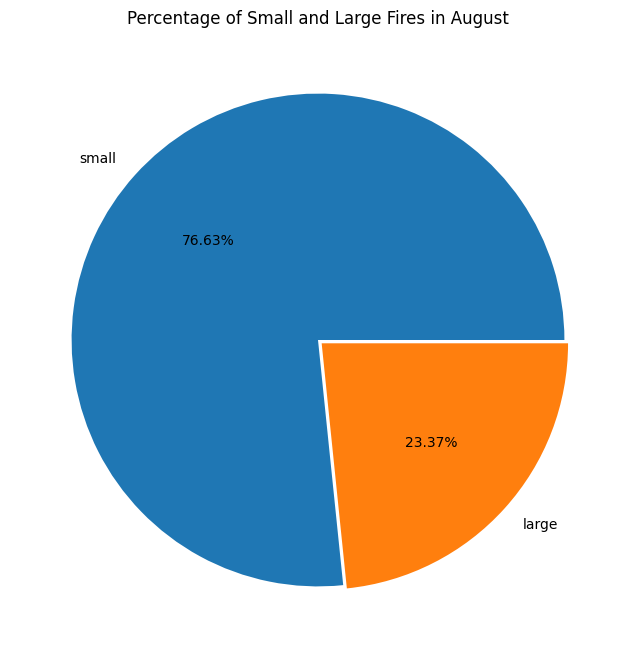

In [7]:
#Number of Fire in August
august_fires = df[df['month'] == 'aug']

y_count = august_fires['size_category'].value_counts(normalize=True).reset_index()
y_count.columns = ['size_category', 'percentage']
y_count['percentage'] *= 100  # Convert to percentage

# Display the pie chart
pd.set_option("display.max_columns", 31)
plt.figure(figsize=(8, 8))
plt.pie(y_count['percentage'], labels=y_count['size_category'], autopct='%1.2f%%', explode=(0, 0.02))
plt.title("Percentage of Small and Large Fires in August")
plt.show()


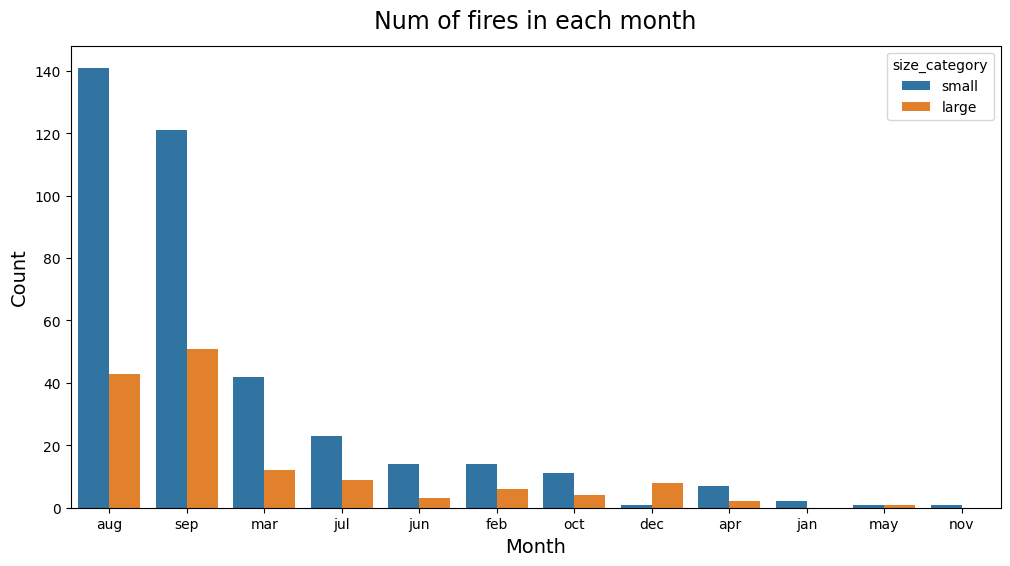

In [8]:
#Number of fires in each month
month_df=df.groupby(['size_category', 'month']).size().reset_index().rename(columns={0:'count'}).sort_values('count', ascending=False)
month_df.head(10)
plt.figure(figsize=(12,6))
sns.barplot(x='month', y='count', hue='size_category', data=month_df)
plt.title("Num of fires in each month", fontsize=17, y=1.02)
plt.xlabel('Month', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.show()

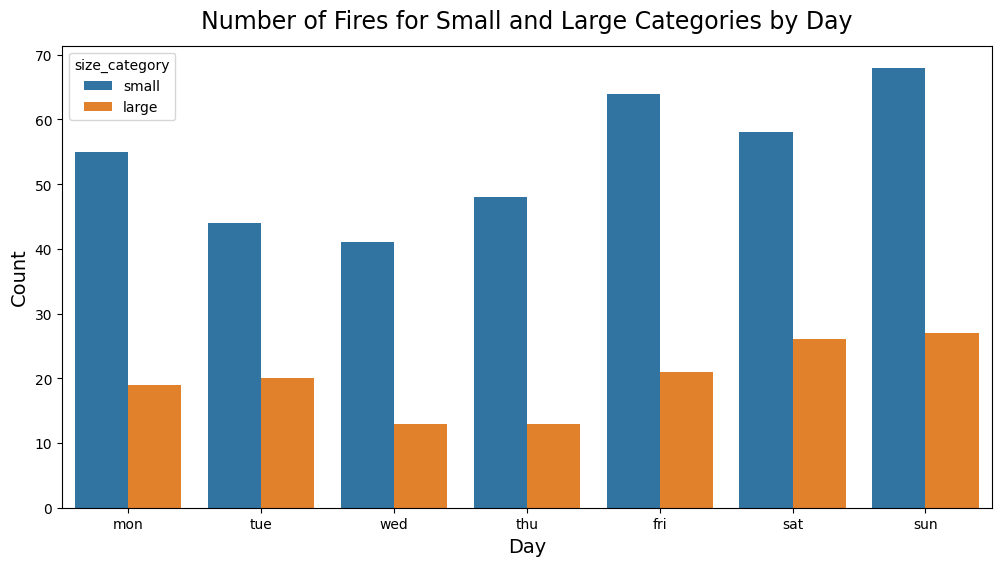

In [9]:
#Number of fires in each day(Monday to Sunday)
day_df = df.groupby(['size_category', 'day']).size().reset_index(name='count').sort_values('count', ascending=False)
plt.figure(figsize=(12, 6))
sns.barplot(x='day', y='count', hue='size_category', data=day_df, order=['mon', 'tue', 'wed', 'thu', 'fri', 'sat', 'sun'])
plt.title("Number of Fires for Small and Large Categories by Day", fontsize=17, y=1.02)
plt.xlabel('Day', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.show()


'''
Observation:
Aug month has seen highest number of small fires. 
Whereas sep month has seen highest num of large fires. 
Least num of fires occured in month of nov.
'''

In [11]:
labelencoder = LabelEncoder()
df.iloc[:,-1] = labelencoder.fit_transform(df.iloc[:,-1])
print(df['size_category']) #1 for small, 0 for large

0      1
1      1
2      1
3      1
4      1
      ..
512    0
513    0
514    0
515    1
516    1
Name: size_category, Length: 517, dtype: object


In [12]:
rain_df=df.groupby(['size_category', 'rain']).size().reset_index().rename(columns={0:'count'}).sort_values('count', ascending=False)
print(rain_df)

   size_category  rain  count
2              1   0.0    371
0              0   0.0    138
3              1   0.2      2
5              1   0.8      2
1              0   6.4      1
4              1   0.4      1
6              1   1.0      1
7              1   1.4      1


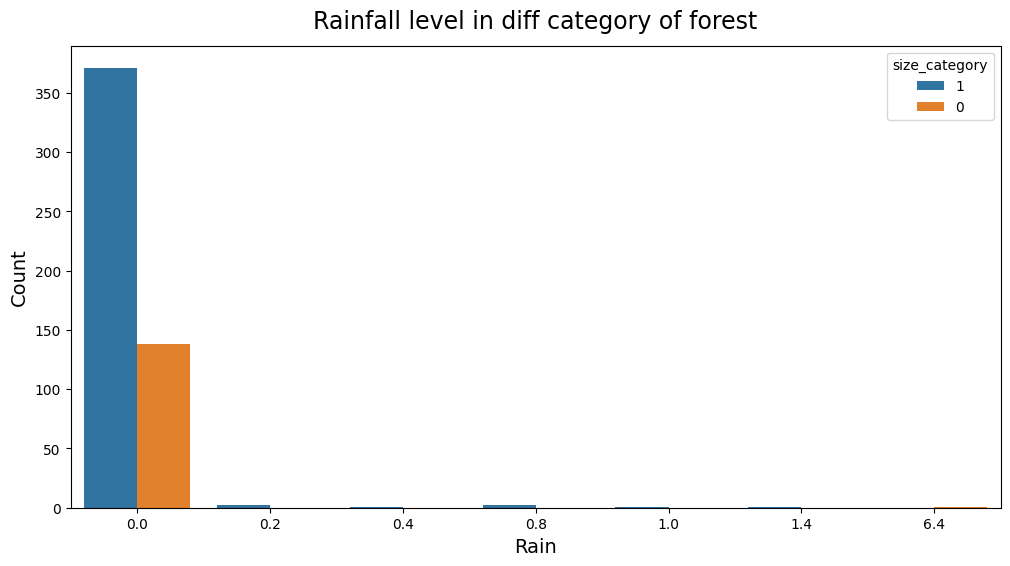

In [13]:
plt.figure(figsize=(12,6))
rain_df['size_category'] = rain_df['size_category'].astype(str)
sns.barplot(x='rain', y='count', hue='size_category', data= rain_df)
plt.title("Rainfall level in diff category of forest", y=1.02, fontsize=17)
plt.xlabel('Rain', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.show()

'''
Observation:
0 represents large forest fire, 1 represents small forest fire.
Majority of the forests have almost no rainfall.
Highest rainfall a forest has was of 6.4 and it comes under a large forest fire category.
'''

In [14]:
#Drop unnecessary columns 
df.drop(['month', 'day', 'monthjan', 'daymon'], axis=1, inplace=True)
pd.set_option("display.max_columns", 27)
print(df.head())


   FFMC   DMC     DC  ISI  temp  RH  wind  rain  area  dayfri  daysat  daysun  \
0  86.2  26.2   94.3  5.1   8.2  51   6.7   0.0   0.0       1       0       0   
1  90.6  35.4  669.1  6.7  18.0  33   0.9   0.0   0.0       0       0       0   
2  90.6  43.7  686.9  6.7  14.6  33   1.3   0.0   0.0       0       1       0   
3  91.7  33.3   77.5  9.0   8.3  97   4.0   0.2   0.0       1       0       0   
4  89.3  51.3  102.2  9.6  11.4  99   1.8   0.0   0.0       0       0       1   

   daythu  daytue  daywed  monthapr  monthaug  monthdec  monthfeb  monthjul  \
0       0       0       0         0         0         0         0         0   
1       0       1       0         0         0         0         0         0   
2       0       0       0         0         0         0         0         0   
3       0       0       0         0         0         0         0         0   
4       0       0       0         0         0         0         0         0   

   monthjun  monthmar  monthmay  month

In [16]:
#Check outliers
data1 = df.copy()


#train the model
clf = IsolationForest(random_state=10, contamination=0.01)
clf.fit(data1)
data1['anomaly'] = clf.predict(data1.iloc[:,0:27])  
outliers = data1[data1['anomaly'] == -1]
print(outliers)

     FFMC   DMC     DC   ISI  temp   RH  wind  rain   area  dayfri  daysat  \
281  85.4  25.4  349.7   2.6   5.1   24   8.5   0.0  24.77       0       0   
299  53.4  71.0  233.8   0.4  10.6   90   2.7   0.0   0.00       0       1   
379  18.7   1.1  171.4   0.0   5.2  100   0.9   0.0   0.00       0       0   
463  75.1   4.4   16.2   1.9   4.6   82   6.3   0.0   5.39       0       0   
464  75.1   4.4   16.2   1.9   5.1   77   5.4   0.0   2.14       0       0   
469  91.0  14.6   25.6  12.3  13.7   33   9.4   0.0  61.13       0       0   

     daysun  daythu  ...  monthapr  monthaug  monthdec  monthfeb  monthjul  \
281       0       0  ...         0         0         1         0         0   
299       0       0  ...         0         0         0         0         0   
379       1       0  ...         0         0         0         0         0   
463       0       0  ...         0         0         0         1         0   
464       0       0  ...         0         0         0         

In [17]:
#Remove Outliers
outliers.index
df.drop([281,299,379,464,469], axis=0, inplace=True)
print(df.shape)

(512, 27)


In [20]:
#Splitting data into target variable and independent variables

x = df.drop('size_category', axis=1)
y = df['size_category']

In [22]:
#Converting independent features into normalised and standardized data

norm = MinMaxScaler()
std = StandardScaler()

x_norm = pd.DataFrame(norm.fit_transform(x), columns=x.columns) #data between -3 to +3
x_std = pd.DataFrame(std.fit_transform(x), columns=x.columns) #data between -1 and +1

print(x_std.head())

       FFMC       DMC        DC       ISI      temp        RH      wind  \
0 -1.129444 -1.343585 -1.861714 -0.879401 -1.888730  0.432841  1.527859   
1 -0.071609 -1.199059  0.477664 -0.525533 -0.174262 -0.694332 -1.759440   
2 -0.071609 -1.068671  0.550108 -0.525533 -0.769078 -0.694332 -1.532730   
3  0.192850 -1.232048 -1.930088 -0.016847 -1.871235  3.313395 -0.002435   
4 -0.384151 -0.949279 -1.829561  0.115854 -1.328904  3.438637 -1.249342   

       rain      area    dayfri    daysat    daysun   daythu    daytue  \
0 -0.073627 -0.200453  2.241323 -0.439856 -0.471123 -0.36777 -0.371184   
1 -0.073627 -0.200453 -0.446165 -0.439856 -0.471123 -0.36777  2.694080   
2 -0.073627 -0.200453 -0.446165  2.273472 -0.471123 -0.36777 -0.371184   
3  0.599535 -0.200453  2.241323 -0.439856 -0.471123 -0.36777 -0.371184   
4 -0.073627 -0.200453 -0.446165 -0.439856  2.122587 -0.36777 -0.371184   

     daywed  monthapr  monthaug  monthdec  monthfeb  monthjul  monthjun  \
0 -0.343371 -0.125988 -0.7489

In [28]:
#Creating train and test data for model validation, with the train-test-rate = 3:1

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=42)
print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)

(384, 26) (128, 26) (384,) (128,)


In [32]:
#Kernel = rbf
y_train=y_train.astype('int')
y_test=y_test.astype('int')

clf = SVC()
param_grids = [{'kernel':['rbf'], 'C': [15,14,13,12,11,10,1,0.1,0.001]}]
grid = GridSearchCV(clf, param_grids, cv=20)
grid.fit(x_train,y_train)
print(grid.best_score_)
print(grid.best_params_)

0.8251315789473684
{'C': 15, 'kernel': 'rbf'}


In [33]:
'''
Use the best C value given by the gird search and then run the below experiment, output the
train and test accuracy for each experiment

rbf kernel with gamma as scale 
rbf kernel with gamma as auto
'''

# Best C from GridSearch
best_C = grid.best_params_['C']

# Experiment 1: gamma='scale'
clf_scale = SVC(kernel='rbf', C=best_C, gamma='scale')
clf_scale.fit(x_train, y_train)

train_acc_scale = accuracy_score(y_train, clf_scale.predict(x_train))
test_acc_scale = accuracy_score(y_test, clf_scale.predict(x_test))

print("RBF Kernel with gamma='scale'")
print(f"Train Accuracy: {train_acc_scale:.4f}")
print(f"Test Accuracy: {test_acc_scale:.4f}\n")


RBF Kernel with gamma='scale'
Train Accuracy: 0.8281
Test Accuracy: 0.9062



In [34]:
# Experiment 2: gamma='auto'
clf_auto = SVC(kernel='rbf', C=best_C, gamma='auto')
clf_auto.fit(x_train, y_train)

train_acc_auto = accuracy_score(y_train, clf_auto.predict(x_train))
test_acc_auto = accuracy_score(y_test, clf_auto.predict(x_test))

print("RBF Kernel with gamma='auto'")
print(f"Train Accuracy: {train_acc_auto:.4f}")
print(f"Test Accuracy: {test_acc_auto:.4f}")

RBF Kernel with gamma='auto'
Train Accuracy: 1.0000
Test Accuracy: 0.8125


In [35]:
'''
Take the rbf as an example, do the grid search for the kernel of Polynomial and Linear,
respectively. Use the best value given by the grid search, output the train and test train and test
accuracy for each experiment

Kernel = Polynomial Kernel = Linear
'''

# Grid Search for RBF
param_grid_rbf = [{'kernel': ['rbf'], 'C': [15,14,13,12,11,10,1,0.1,0.001]}]
grid_rbf = GridSearchCV(SVC(), param_grid_rbf, cv=20)
grid_rbf.fit(x_train, y_train)

best_rbf = grid_rbf.best_estimator_
train_acc_rbf = accuracy_score(y_train, best_rbf.predict(x_train))
test_acc_rbf = accuracy_score(y_test, best_rbf.predict(x_test))

print("RBF Kernel")
print("Best Params:", grid_rbf.best_params_)
print(f"Train Accuracy: {train_acc_rbf:.4f}")
print(f"Test Accuracy: {test_acc_rbf:.4f}\n")

RBF Kernel
Best Params: {'C': 15, 'kernel': 'rbf'}
Train Accuracy: 0.8281
Test Accuracy: 0.9062



In [36]:
# Grid Search for Linear
param_grid_linear = [{'kernel': ['linear'], 'C': [15,14,13,12,11,10,1,0.1,0.001]}]
grid_linear = GridSearchCV(SVC(), param_grid_linear, cv=20)
grid_linear.fit(x_train, y_train)

best_linear = grid_linear.best_estimator_
train_acc_linear = accuracy_score(y_train, best_linear.predict(x_train))
test_acc_linear = accuracy_score(y_test, best_linear.predict(x_test))

print("Linear Kernel")
print("Best Params:", grid_linear.best_params_)
print(f"Train Accuracy: {train_acc_linear:.4f}")
print(f"Test Accuracy: {test_acc_linear:.4f}\n")

Linear Kernel
Best Params: {'C': 15, 'kernel': 'linear'}
Train Accuracy: 1.0000
Test Accuracy: 0.9844



In [37]:
# Grid Search for Polynomial
param_grid_poly = [{'kernel': ['poly'], 'C': [15,14,13,12,11,10,1,0.1,0.001], 'degree': [2, 3, 4]}]
grid_poly = GridSearchCV(SVC(), param_grid_poly, cv=20)
grid_poly.fit(x_train, y_train)

best_poly = grid_poly.best_estimator_
train_acc_poly = accuracy_score(y_train, best_poly.predict(x_train))
test_acc_poly = accuracy_score(y_test, best_poly.predict(x_test))

print("Polynomial Kernel")
print("Best Params:", grid_poly.best_params_)
print(f"Train Accuracy: {train_acc_poly:.4f}")
print(f"Test Accuracy: {test_acc_poly:.4f}")

Polynomial Kernel
Best Params: {'C': 15, 'degree': 4, 'kernel': 'poly'}
Train Accuracy: 0.8594
Test Accuracy: 0.9219


First 10 records of the test dataset:
   age          workclass      education  educationno        maritalstatus  \
0   25            Private           11th            7        Never-married   
1   38            Private        HS-grad            9   Married-civ-spouse   
2   28          Local-gov     Assoc-acdm           12   Married-civ-spouse   
3   44            Private   Some-college           10   Married-civ-spouse   
4   34            Private           10th            6        Never-married   
5   63   Self-emp-not-inc    Prof-school           15   Married-civ-spouse   
6   24            Private   Some-college           10        Never-married   
7   55            Private        7th-8th            4   Married-civ-spouse   
8   65            Private        HS-grad            9   Married-civ-spouse   
9   36        Federal-gov      Bachelors           13   Married-civ-spouse   

           occupation    relationship    race      sex  capitalgain  \
0   Machine-op-inspct       Own-

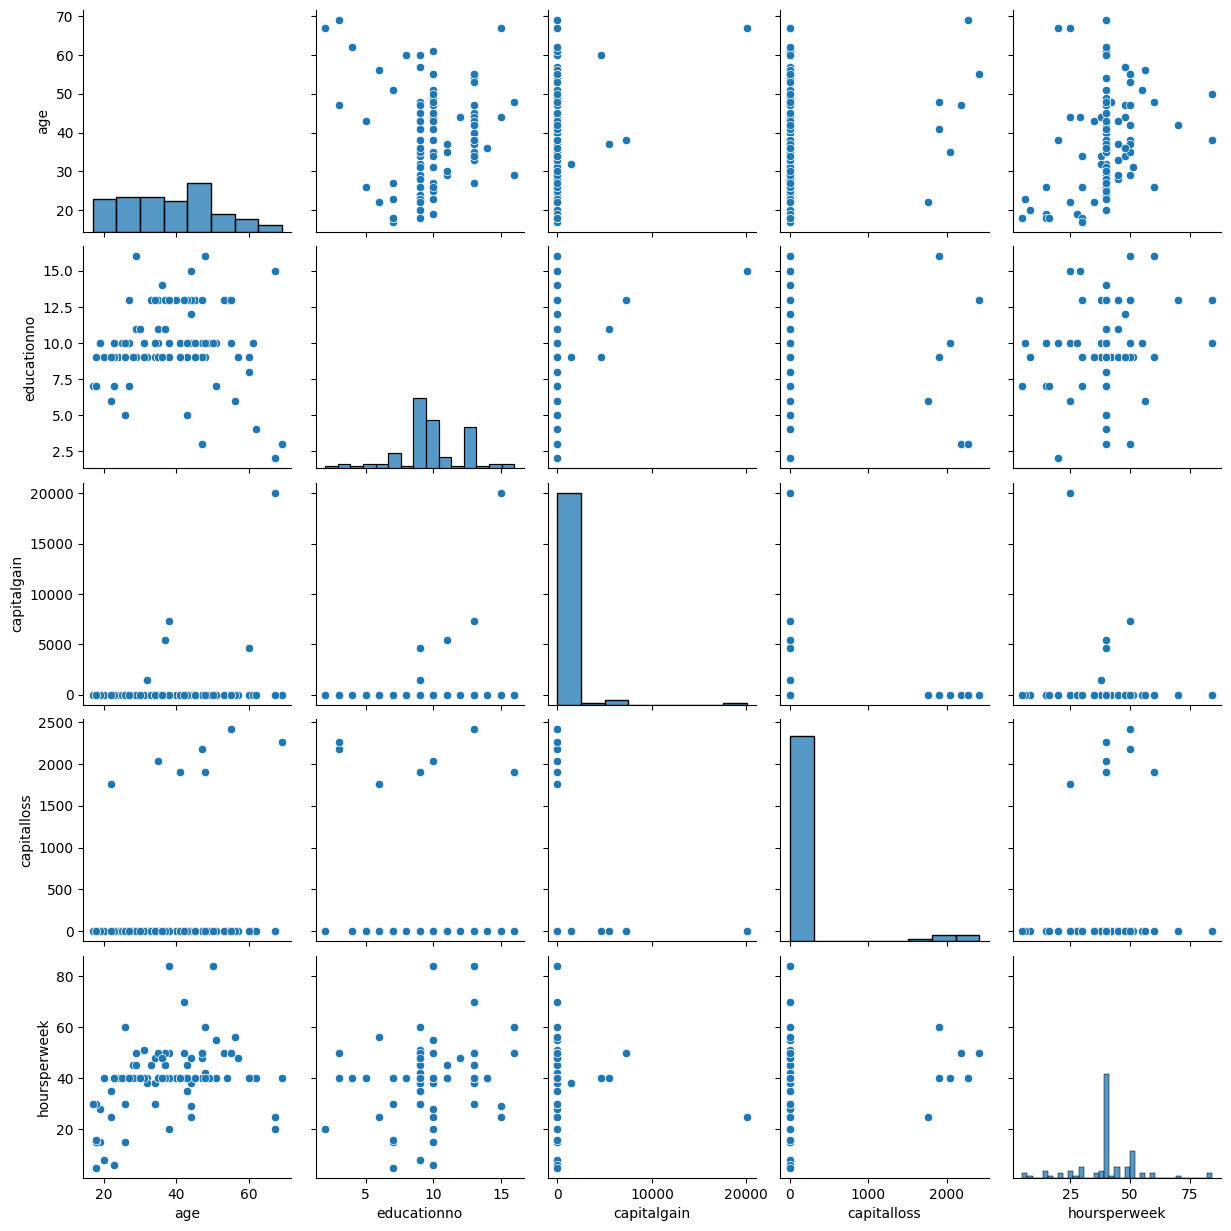

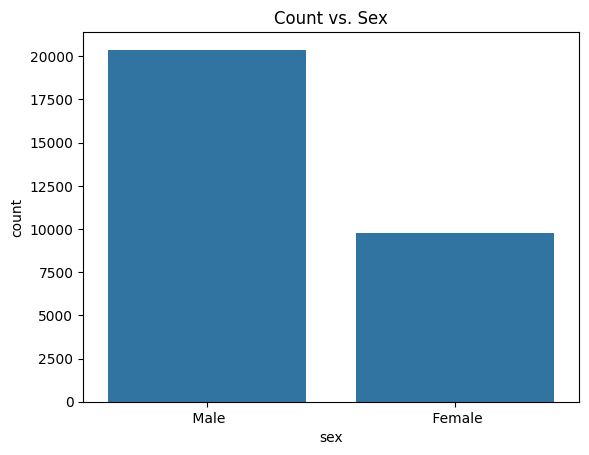

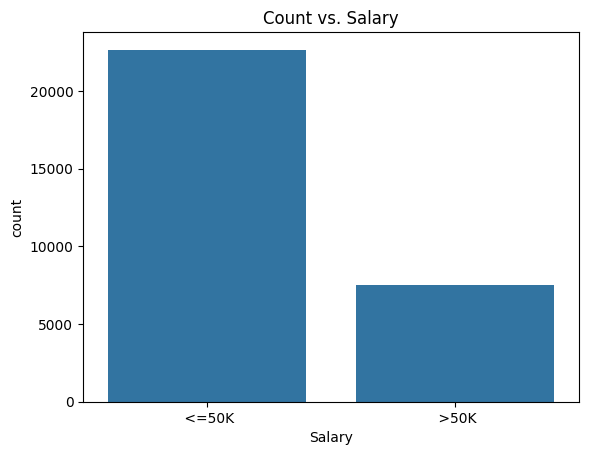

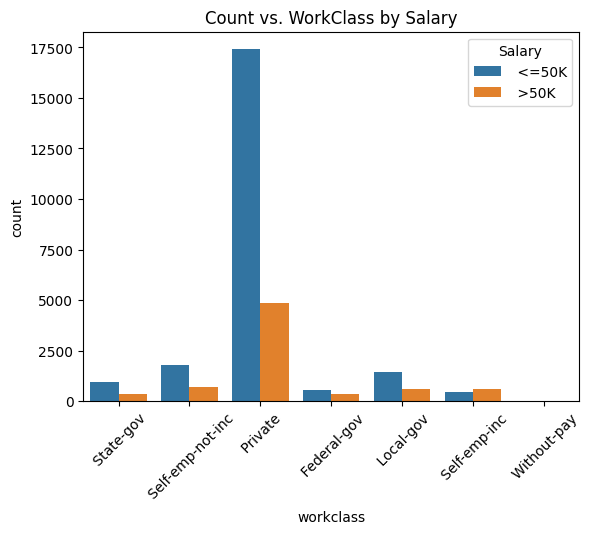

/var/folders/hw/y6fwz_fd4gb_bfbypy75q0n80000gn/T/ipykernel_82095/491251430.py:67: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  train_data_sampled = train_data.groupby('Salary', group_keys=False).apply(lambda x: x.sample(n=25, random_state=42))
/var/folders/hw/y6fwz_fd4gb_bfbypy75q0n80000gn/T/ipykernel_82095/491251430.py:68: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  test_data_sampled = test_data.groupby

ValueError: The number of classes has to be greater than one; got 1 class

In [3]:
#1
import os
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

from sklearn.svm import SVC
from sklearn import svm
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report

#2 Load Data
train_data = pd.read_csv('SalaryData_Train.csv')
test_data = pd.read_csv('SalaryData_Test.csv')

print("First 10 records of the test dataset:")
print(test_data.head(10))

#3 Explore Dataset
print(f"\nTrain dataset size: {train_data.shape}")
print(f"Test dataset size: {test_data.shape}")
print("\nTrain data description:")
print(train_data.describe())
print("\nTrain data info:")
print(train_data.info())

age_min = train_data['age'].min()
age_max = train_data['age'].max()
print(f"\nAge column range: {age_min} to {age_max}")

#4 Visualizations
# Sample data for pairplot to avoid crash
sns.pairplot(train_data.sample(n=100, random_state=1))
plt.show()

sns.countplot(x='sex', data=train_data)
plt.title("Count vs. Sex")
plt.show()

sns.countplot(x='Salary', data=train_data)
plt.title("Count vs. Salary")
plt.show()

sns.countplot(x='workclass', hue='Salary', data=train_data)
plt.title("Count vs. WorkClass by Salary")
plt.xticks(rotation=45)
plt.legend(title='Salary')
plt.show()

#5 Encode Categorical Features
categorical_cols = ['workclass', 'education', 'maritalstatus', 'occupation', 
                    'relationship', 'race', 'sex', 'native']

le = LabelEncoder()
for col in categorical_cols:
    train_data[col] = le.fit_transform(train_data[col])
    test_data[col] = le.transform(test_data[col])  # Ensuring consistent mapping

# Encode target
train_data['Salary'] = train_data['Salary'].apply(lambda x: 0 if x == "<=50K" else 1)
test_data['Salary'] = test_data['Salary'].apply(lambda x: 0 if x == "<=50K" else 1)

#6 Dataset Sampling (Stratified)
train_data_sampled = train_data.groupby('Salary', group_keys=False).apply(lambda x: x.sample(n=25, random_state=42))
test_data_sampled = test_data.groupby('Salary', group_keys=False).apply(lambda x: x.sample(n=25, random_state=42))

# Use age and educationno for visualization
selected_columns = ['age', 'educationno']
X_train = train_data_sampled[selected_columns]
X_test = test_data_sampled[selected_columns]
y_train = train_data_sampled['Salary']
y_test = test_data_sampled['Salary']

# Feature Scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

#7 Train & Visualize SVM with Different Kernels
for kernel in ("linear", "rbf", "poly"):
    clf = svm.SVC(kernel=kernel, gamma=0.1)
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    
    accuracy = accuracy_score(y_test, y_pred)
    print(f"Accuracy for SVM with {kernel} kernel: {accuracy * 100:.2f}%")
    
    # Plot
    plt.figure()
    plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=plt.cm.Paired, edgecolor="k", s=50)
    plt.scatter(X_test[:, 0], X_test[:, 1], s=100, facecolors="none", edgecolor="k")

    x_min, x_max = X_train[:, 0].min() - 1, X_train[:, 0].max() + 1
    y_min, y_max = X_train[:, 1].min() - 1, X_train[:, 1].max() + 1
    XX, YY = np.meshgrid(np.linspace(x_min, x_max, 300), np.linspace(y_min, y_max, 300))
    Z = clf.decision_function(np.c_[XX.ravel(), YY.ravel()]).reshape(XX.shape)

    plt.contour(XX, YY, Z, colors='k', levels=[-0.5, 0, 0.5], linestyles=["--", "-", "--"])
    plt.pcolormesh(XX, YY, Z > 0, cmap=plt.cm.Paired, shading='auto', alpha=0.2)

    plt.xlabel("Age")
    plt.ylabel("Education No")
    plt.title(f"SVM Decision Boundary with {kernel} Kernel")
    plt.axis("tight")

plt.show()
